# 求解微分方程(组)
## 1.符号解

例一

In [3]:
from sympy.abc import x
from sympy import diff,dsolve,simplify,Function

y = Function('y')
eq = diff(y(x),x,2)+2*diff(y(x),x)+2*y(x)  #定义方程
con = {y(0):0, diff(y(x),x).subs(x,0):1}  #定义初值条件
y = dsolve(eq, ics=con)
print(simplify(y))
print(y)

Eq(y(x), exp(-x)*sin(x))
Eq(y(x), exp(-x)*sin(x))


例二

In [2]:
from sympy.abc import x
from sympy import Function, diff, dsolve, sin

y = Function('y')
eq = diff(y(x),x,2)+2*diff(y(x),x)+2*y(x)-sin(x)
con = {y(0):0, diff(y(x),x).subs(x,0):1}
y = dsolve(eq, ics=con)
print(y)

Eq(y(x), (6*sin(x)/5 + 2*cos(x)/5)*exp(-x) + sin(x)/5 - 2*cos(x)/5)


例三

In [7]:
import sympy as sp

t = sp.symbols('t')
x1,x2,x3 = sp.symbols('x1,x2,x3',cls=sp.Function)
eq = [sp.diff(x1(t),t)-2*x1(t)+3*x2(t)-3*x3(t),
      sp.diff(x2(t),t)-4*x1(t)+5*x2(t)-3*x3(t),
      sp.diff(x3(t),t)-4*x1(t)+4*x2(t)-2*x3(t)]
con = {x1(0):1, x2(0):2, x3(0):3}
s = sp.dsolve(eq,ics=con)
print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


简洁的程序(例三)

In [8]:
import sympy as sp

t = sp.symbols('t')
x1,x2,x3 = sp.symbols('x1:4',cls=sp.Function)
x = sp.Matrix([x1(t),x2(t),x3(t)])
A = sp.Matrix([[2,-3,3],[4,-5,3],[4,-4,2]])
eq = x.diff(t)-A*x
s = sp.dsolve(eq, ics={x1(0):1, x2(0):2,x3(0):3})
print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


# 2.数值解
常微分方程的数值求解是基于一阶方程进行的，高阶微分方程必须化成一阶方程，通常采用龙格-库塔方法

scipy.integrate模块的odeint函数求常微分方程的数值解
```python
    sol = odeint(func, y0, t)
```
适合$\frac{dy}{dt} = f(y.t)$的初值问题

func是定义微分方程的函数或匿名函数 $f(y,t)$没有$\frac{dy}{dt}$

y0是初始条件的序列

t是一个自变量取值的序列(t的第一个元素一定为初始时刻)

返回值sol是对应序列t中元素的数值解，如果微分方程组有n个函数，返回值是n列的矩阵

例一

In [ ]:
from scipy.integrate import odeint
from numpy import arange

dy = lambda y,x: -2*y+x**2+2*x  # dy/dx = -2*y+x**2+2*x
x = arange(1,10.5,0.5)
sol = odeint(dy, 2, x)
print('x={}\n对应的数值解y={}'.format(x, sol.T))

x=[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
对应的数值解y=[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


例二

把原来的二阶微分方程化为一阶微分方程再求解

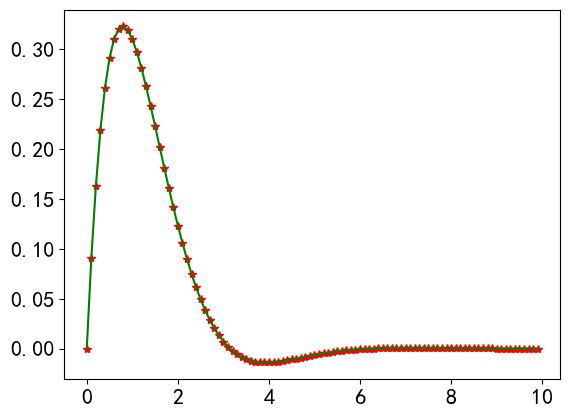

In [24]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def Pfun(y,x):
    y1,y2 = y  # 解包状态变量
    return np.array([y2, -2*y1-2*y2])
x = np.arange(0,10,0.1)  #创建时间点
sol_1 = odeint(Pfun, [0.0,1.0], x)  #求数值解
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.plot(x, sol_1[:,0],'r*',label='数值解')
plt.plot(x, np.exp(-x)*np.sin(x),'g', label='符号解曲线')
plt.show()

### Lorenz模型的混沌效应

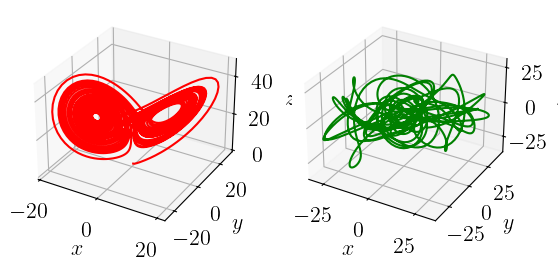

sol_1= [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.51228522e-02  1.00353502e+00  4.79004160e-04]
 [ 1.82774668e-01  1.03241643e+00  1.86842924e-03]
 ...
 [ 6.09359691e+00 -2.92299103e+00  3.38259871e+01]
 [ 5.22166759e+00 -3.19224234e+00  3.27650429e+01]
 [ 4.41196211e+00 -3.36467046e+00  3.17470149e+01]] 

 sol_1-sol_2= [[ 0.00000000e+00 -1.00000000e-04  0.00000000e+00]
 [-9.51228551e-06 -1.00353479e-04 -9.58055863e-08]
 [-1.82774502e-05 -1.03241296e-04 -3.73704777e-07]
 ...
 [ 1.65199550e+01  1.28275813e+00 -1.70072250e+00]
 [ 1.50178317e+01  2.41273736e-01 -2.20722691e+00]
 [ 1.35697202e+01 -5.93821006e-01 -2.59441701e+00]]


In [27]:
from scipy.integrate import odeint
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def lorenz(w,t):
    sigma = 10; rho = 28; beta = 8/3
    x,y,z = w
    return np.array([sigma*(y-x), rho*x-y-x*z, x*y-beta*z])
t = np.arange(0,50,0.01)  #创建时间点
sol_1 = odeint(lorenz, [0.0,1.0,0.0], t)
sol_2 = odeint(lorenz, [0.0,1.0001,0.0], t)
plt.rc('font',size=16); plt.rc('text',usetex=True)
ax1 = plt.subplot(121,projection='3d')
ax1.plot(sol_1[:,0], sol_1[:,1], sol_1[:,2],'r')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$y$'); ax1.set_zlabel('$z$')

ax2 = plt.subplot(122,projection='3d')
ax2.plot(sol_1[:,0]-sol_2[:,0],sol_1[:,1]-sol_2[:,1],sol_1[:,2]-sol_2[:,2],'g')
ax2.set_xlabel('$x$'); ax2.set_ylabel('$y$'); ax2.set_zlabel('$z$')
plt.show()
print('sol_1=',sol_1,'\n\n','sol_1-sol_2=',sol_1-sol_2)